In [3]:
!pip install keras.applications


     |████████████████████████████████| 51kB 2.8MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [5]:
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 144
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)

for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)

In [7]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/sugarcane_aug/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/sugarcane_aug/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 1200 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [8]:

x_batch, y_batch = next(train_generator)

In [9]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath="/content/drive/MyDrive/sugarcanr-aug-ResNet.hdf5"

checkpoint = ModelCheckpoint(
     filepath,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
37/37 [==============================] - 603s 15s/step - loss: 2.0163 - accuracy: 0.2040 - val_loss: 1.7754 - val_accuracy: 0.2031
Epoch 2/144
37/37 [==============================] - 100s 3s/step - loss: 1.9408 - accuracy: 0.1933 - val_loss: 2.5772 - val_accuracy: 0.2031
Epoch 3/144
37/37 [==============================] - 99s 3s/step - loss: 1.7930 - accuracy: 0.2444 - val_loss: 4.2918 - val_accuracy: 0.2031
Epoch 4/144
37/37 [==============================] - 99s 3s/step - loss: 1.6527 - accuracy: 0.2903 - val_loss: 6.0399 - val_accuracy: 0.2031
Epoch 5/144
37/37 [==============================] - 99s 3s/step - loss: 1.5814 - accuracy: 0.3224 - val_loss: 6.9113 - val_accuracy: 0.2031
Epoch 6/144
37/37 [==============================] - 99s 3s/step - loss: 1.5085 - accuracy: 0.3567 - val_loss: 6.6253 - val_accuracy: 0.2031
Epoch 7/144
37/37 [==============================] - 99s 3s/step - loss: 1.4219 - accuracy: 0.4194 - val_loss: 6.0092 - val_accuracy: 0.2031
Epoch 8/14

KeyboardInterrupt: ignored

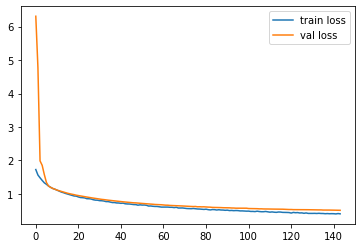

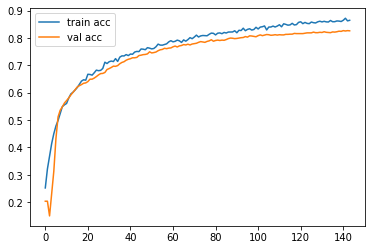

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_sugarresnet_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_sugarresnet_acc')

In [ ]:
filepath1="/content/drive/MyDrive/sugar-aug-resnet.hdf5"
filepath2="/content/drive/MyDrive/sugar-aug-resnet.h5"


model.save(filepath1)
model.save(filepath2)

In [10]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [11]:
img_size=336
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

trial_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/sugarcane_aug/trial',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 20 images belonging to 5 classes.


In [12]:
img_size=336
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/sugarcane_aug/test',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 100 images belonging to 5 classes.


In [13]:
from tensorflow import keras
filepath1="/content/drive/MyDrive/sugar-aug-resnet.hdf5"
model = keras.models.load_model(filepath1)

In [14]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [15]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [16]:
predict = model.predict_generator(valid_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [17]:
predict1=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
predict2=model.predict_generator(trial_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[36  0  3  0  1]
 [ 1 37  0  2  0]
 [ 4  1 35  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Confusion matrix, without normalization


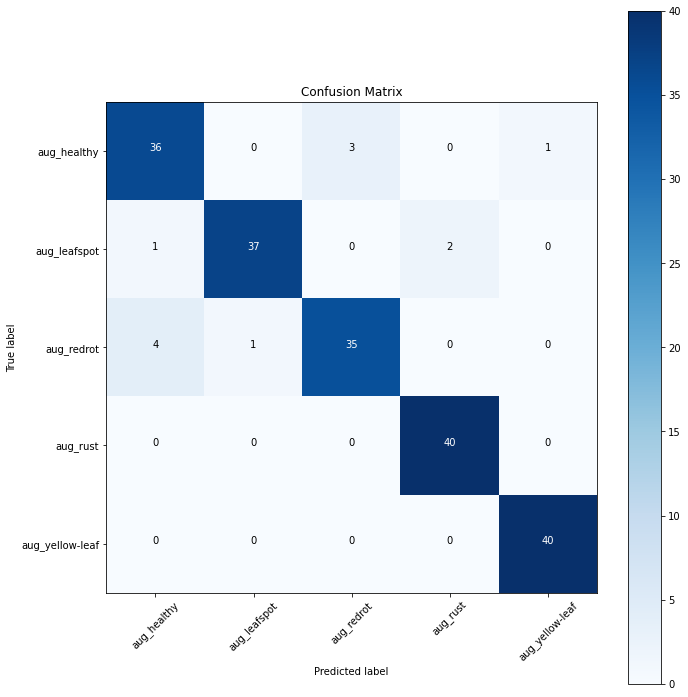

In [19]:
y_pred = np.argmax(predict, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')




In [20]:
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    aug_healthy       0.88      0.90      0.89        40
   aug_leafspot       0.97      0.93      0.95        40
     aug_redrot       0.92      0.88      0.90        40
       aug_rust       0.95      1.00      0.98        40
aug_yellow-leaf       0.98      1.00      0.99        40

       accuracy                           0.94       200
      macro avg       0.94      0.94      0.94       200
   weighted avg       0.94      0.94      0.94       200



Confusion Matrix
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 1  1  0 17  1]
 [ 1  0  1  0 18]]
Confusion matrix, without normalization


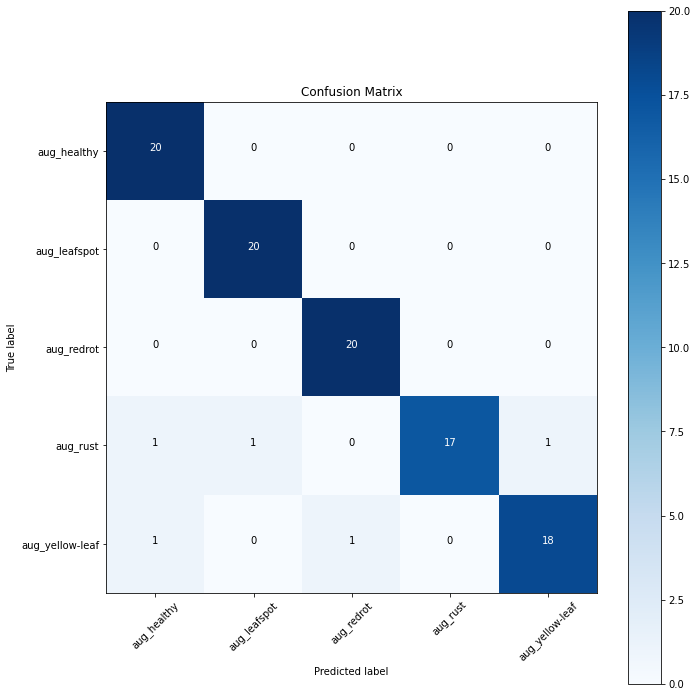

In [21]:
y_pred = np.argmax(predict1, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [22]:
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    aug_healthy       0.91      1.00      0.95        20
   aug_leafspot       0.95      1.00      0.98        20
     aug_redrot       0.95      1.00      0.98        20
       aug_rust       1.00      0.85      0.92        20
aug_yellow-leaf       0.95      0.90      0.92        20

       accuracy                           0.95       100
      macro avg       0.95      0.95      0.95       100
   weighted avg       0.95      0.95      0.95       100



Confusion Matrix
[[ 0  0]
 [20  0]]
Confusion matrix, without normalization


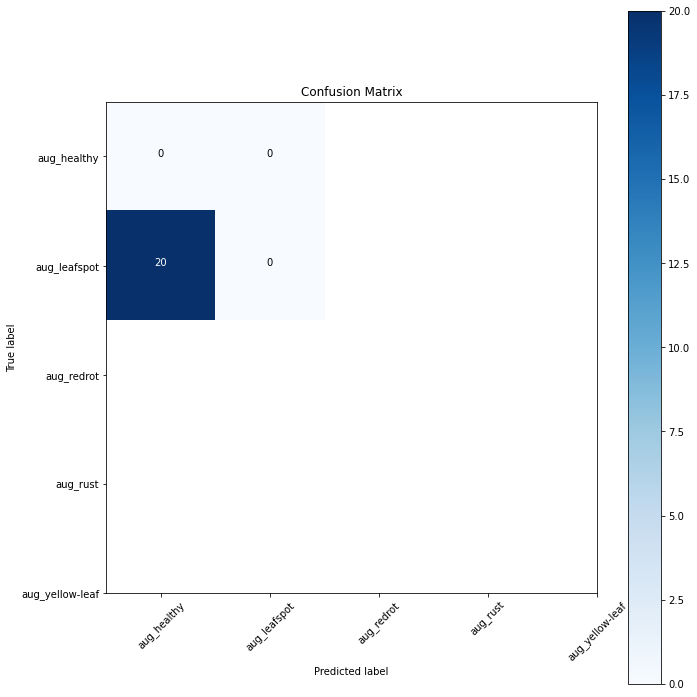

In [23]:
y_pred = np.argmax(predict2, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(trial_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [24]:
from tensorflow import keras
filepath ="/content/drive/MyDrive/sugar-aug-resnet.h5"
model = keras.models.load_model(filepath)

In [25]:
!pip install tflite

     |████████████████████████████████| 92kB 3.5MB/s 


In [26]:
import tensorflow as tf
import tflite
print(tf.__version__)
print(tflite.__version__)

2.4.1
2.4.0


In [27]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_sugarcane_resnetmodel.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpmqljg6bx/assets


94005508